## Project 1 : Kannada MNIST - Classification Problem

### Problem Statement: This is an extension of clasic MNIST classification problem. Instead of using Hindu numerals, lets use a recently-released dataset of Kannada digits. This is a 10 Class classification problem.

### Kannada is a language spoken predominantly by people of Karnataka in southwestern India. The language has roughly 45 million native speakers and is written using the Kannada script. https: //en.wikipedia.org/wiki/Kannada

### Dataset can be downloaded from the link : https://www.kaggle.com/datasets/higgstachyon/kannada-mnist. 

### All details of the dataset curation has been captured in the paper titled: Prabhu, Vinay Uday. "KannadaMNIST: A new handwritten digits dataset for the Kannada language."https://arxiv.org/abs/1908.01242

### Procedure:

#### 1. Extract the dataset from the npz file from the downloaded dataset or from the web.There are 60000 images for training and 10000 images for test. Each image is of the size 28X28.

#### 2. Perform PCA to 10 components. So now we have train and test images in 10 dimension instead of 28X28 dimension.

#### 3. Now apply the the following models:
#### • Decision Trees
#### • Random forest
#### • Naive Bayes Model
#### • K-NN Classifier
#### • SVM

#### 4. For each of this method produce the following metrics:
#### • Precision, Recall, F1 - Score
#### • Confusion Matrix
#### • RoC - AUC curve

#### 5. Try to repeat the same experiment for different component size : 15,20,25,30

In [1]:
import numpy as np

# Load the training data and labels
train_data = np.load('X_kannada_MNIST_train.npz')
X_train = train_data['arr_0']

train_labels = np.load('y_kannada_MNIST_train.npz')
y_train = train_labels['arr_0']

# Load the test data and labels
test_data = np.load('X_kannada_MNIST_test.npz')
X_test = test_data['arr_0']

test_labels = np.load('y_kannada_MNIST_test.npz')
y_test = test_labels['arr_0']

# Print the shapes of the loaded data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [2]:
# Load the npz file
dataset = np.load('X_kannada_MNIST_train.npz')

# Extract the data
x_train = dataset['arr_0']

# Print the shape of the extracted data
print("Training data shape:", x_train.shape)

Training data shape: (60000, 28, 28)


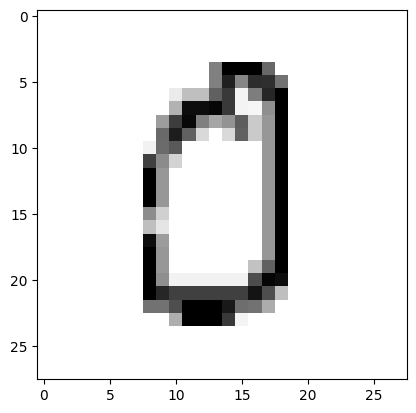

In [3]:
import matplotlib.pyplot as plt
import matplotlib

some_digit=X_train[90]
some_digit_img=some_digit.reshape(28,28,1)

plt.imshow(some_digit_img,cmap=matplotlib.cm.binary,interpolation="nearest")

In [4]:
from sklearn.decomposition import PCA

def pcacompo(num,X_train_2d,X_test_2d):
  pca = PCA(n_components=num)
  X_trainpca = pca.fit_transform(X_train_2d)
  X_testpca = pca.transform(X_test_2d)
  return X_trainpca,X_testpca

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

X_train_pca,X_test_pca = pcacompo(10,X_train_2d,X_test_2d)

X_train_pca,X_test_pca = pcacompo(15,X_train_2d,X_test_2d)


In [5]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score,confusion_matrix

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = model.predict(x_test)

    # Calculate accuracy, f1-score, and recall
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate ROC-AUC score
    y_pred_proba = model.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

    ## Calculating Confusion Matrix
    conf_matrix=confusion_matrix(y_test,y_pred)


    # Return evaluation metrics
    return accuracy, f1, recall, roc_auc, conf_matrix

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
     
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8056
Decision Tree F1-score: 0.8045836394233372
Decision Tree Recall: 0.8055999999999999
Decision Tree ROC-AUC: 0.892
Decision Tree Confusion Matrix:
[[736 138  11  27   6   4   6   9  37  26]
 [ 94 789  11  29   5  10   5   7  29  21]
 [  8   3 931  13   4  21   5   6   3   6]
 [ 15  15  11 783  27  30  25  68  14  12]
 [  0   1   3  37 844  50   9  16  21  19]
 [  5   1   8  20 108 808   7   9  15  19]
 [  5  10   8  45  19  23 780  77   9  24]
 [ 10   8   7  54  22   7 138 667  14  73]
 [ 36  18  14   4   5  16   3   0 887  17]
 [ 11  38   4   4  15  13   7  10  67 831]]


In [7]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8932
Random Forest F1-score: 0.8926801257629812
Random Forest Recall: 0.8932
Random Forest ROC-AUC: 0.9921085555555555
Random Forest Confusion Matrix [[797 151   2  21   6   0   1   4  15   3]
 [ 21 926   1  25   6   2   0   1  10   8]
 [  5   1 980   2   0   8   1   1   2   0]
 [  6   9   1 923  17  17   4  20   3   0]
 [  0   1   0  17 933  25   8   2  10   4]
 [  0   1   0  11 104 872   2   3   5   2]
 [  2   6   3  36  21  21 868  24   3  16]
 [ 10   7   1  39  25   5 104 769   5  35]
 [ 19   8   1   2   1   3   3   0 961   2]
 [  6   8   0   0  15   0   7   2  59 903]]


In [11]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7836
Naive Bayes F1-score: 0.7820966090302685
Naive Bayes Recall: 0.7836
Naive Bayes ROC-AUC: 0.9747628666666666
Naive Bayes Confusion Matrix:
[[603 234  19  47  11   0   2  14  61   9]
 [ 17 776   8  95  18   6   0   2  61  17]
 [  9   2 976   5   0   5   1   0   1   1]
 [ 18  10   3 792  37  19  32  89   0   0]
 [  0   1   1  18 869  44   2  22  33  10]
 [  0   1   8  34 178 736   5  20  13   5]
 [  6   7  49  21  25  40 787  48   4  13]
 [  7  16   7  52  37   1 192 674   2  12]
 [115  24  19   4   3   6   3   1 818   7]
 [ 27  12   3   0  30   0  13   9 101 805]]


In [8]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.9078
K-NN F1-score: 0.9072445938071446
K-NN Recall: 0.9077999999999999
K-NN ROC-AUC: 0.9824462611111111
K-NN Confusion Matrix
[[807 158   2  14   8   0   1   0   7   3]
 [ 17 961   0   5   6   0   0   0   7   4]
 [  3   1 986   4   0   4   1   0   1   0]
 [  9  10   1 914  26  25   2  11   2   0]
 [  0   1   0   5 974  10   1   1   3   5]
 [  0   0   0  10  95 890   2   0   2   1]
 [  2   1   0  25  27  11 888  37   0   9]
 [  7   7   1  35  30   6 122 762   2  28]
 [ 17   6   2   1   2   4   3   0 962   3]
 [  8   8   0   0  19   5   6   1  19 934]]


In [9]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.9146
SVM F1-score: 0.9141342104567791
SVM Recall: 0.9146000000000001
SVM ROC-AUC: 0.9953895555555554
SVM confusion Matrix
[[826 130   1  18   5   0   0   4  11   5]
 [ 15 949   0  13   3   2   1   3  10   4]
 [  3   0 987   3   0   3   1   1   2   0]
 [  7   7   1 916  17  17   5  28   2   0]
 [  0   1   0  10 958  15   2   1   6   7]
 [  0   0   0   8 101 885   3   0   3   0]
 [  0   2   1  19  19  21 910  11   1  16]
 [ 17   9   0  22  19   1  82 802   2  46]
 [  6   3   2   1   2   3   1   0 977   5]
 [  5   9   0   0   9   0   5   0  36 936]]


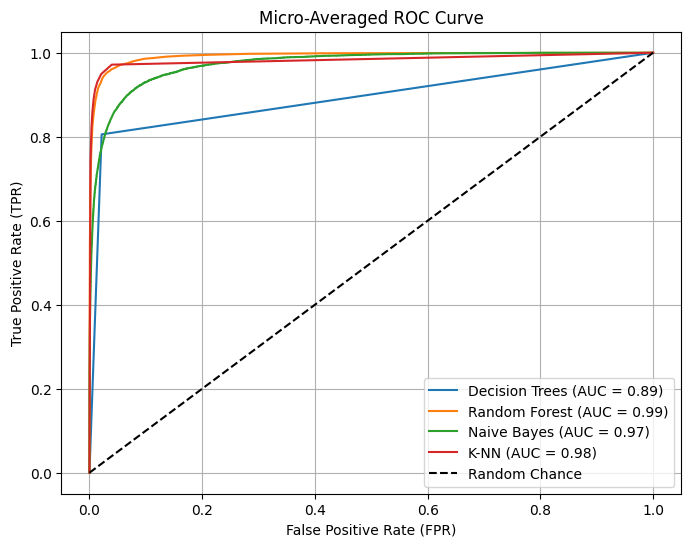

In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_pred_probs = dt_classifier.predict_proba(X_test_pca)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin.ravel(), dt_pred_probs.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

# For Random Forest
rf_pred_probs = rf_classifier.predict_proba(X_test_pca)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin.ravel(), rf_pred_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

# For Naive Bayes
nb_pred_probs = nb_classifier.predict_proba(X_test_pca)
nb_fpr, nb_tpr, _ = roc_curve(y_test_bin.ravel(), nb_pred_probs.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

# For K-NN
knn_pred_probs = knn_classifier.predict_proba(X_test_pca)
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin.ravel(), knn_pred_probs.ravel())
knn_auc = auc(knn_fpr, knn_tpr)


# Plot micro-averaged ROC curves for each classifier
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='K-NN (AUC = {:.2f})'.format(knn_auc))
#plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

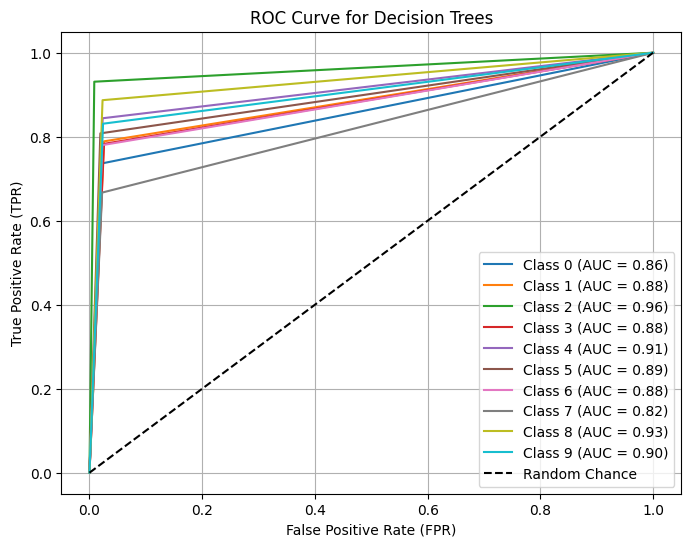

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr[class_idx], dt_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc[class_idx] = auc(dt_fpr[class_idx], dt_tpr[class_idx])

# Plot ROC curves for each class for Decision Trees
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(dt_fpr[class_idx], dt_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, dt_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()    

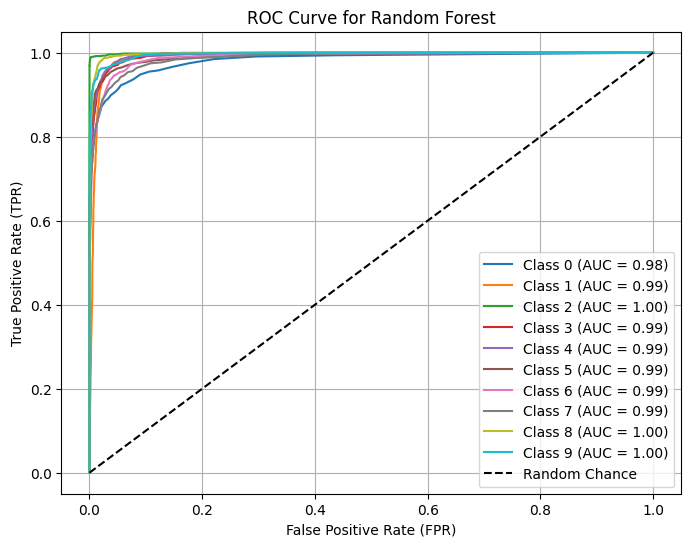

In [14]:
# For Random Forest
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr[class_idx], rf_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc[class_idx] = auc(rf_fpr[class_idx], rf_tpr[class_idx])
    
# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(rf_fpr[class_idx], rf_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, rf_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

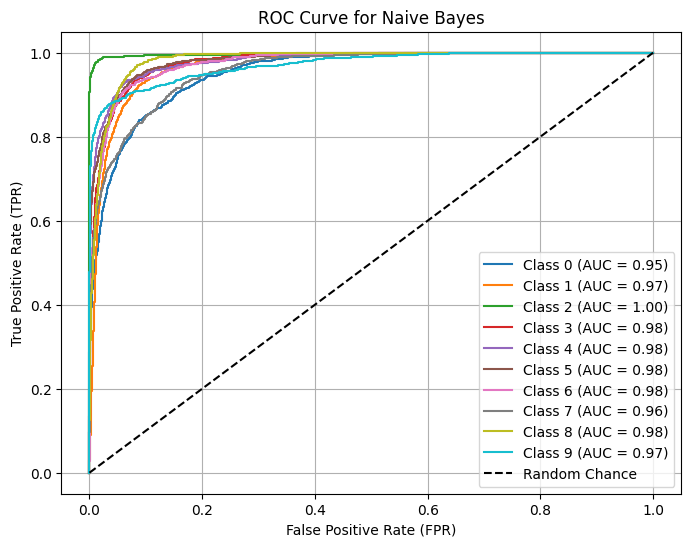

In [15]:
# For Naive Bayes
nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr[class_idx], nb_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc[class_idx] = auc(nb_fpr[class_idx], nb_tpr[class_idx])
    
# Plot ROC curves for each class for Naive Bayes
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(nb_fpr[class_idx], nb_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, nb_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

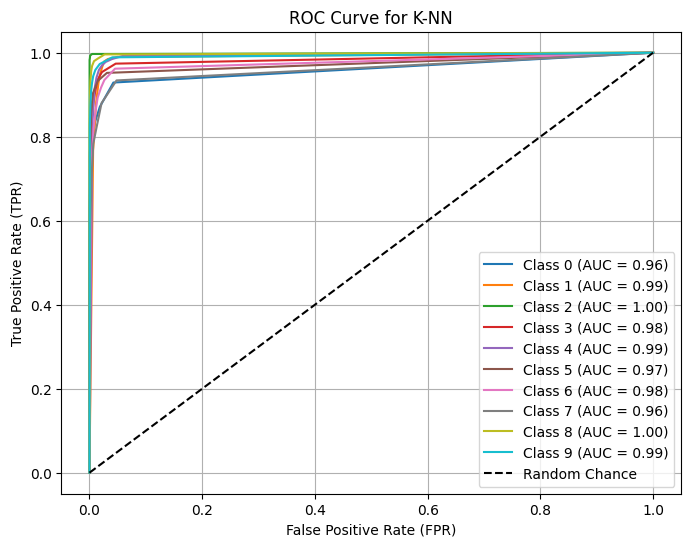

In [16]:
# For K-NN
knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr[class_idx], knn_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc[class_idx] = auc(knn_fpr[class_idx], knn_tpr[class_idx])

# Plot ROC curves for each class for K-NN
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(knn_fpr[class_idx], knn_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, knn_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Project 2 : Toxic Tweets Dataset : NLP Problem

### This dataset has a collection of Tweets. Its labelled as Toxic - 1, Non toxic - 0. Apply the NLP methods to predict the toxicity of the tweets. Download the dataset from the following Kaggle Compitation https://www.kaggle.com/datasets/ashwiniyer176/toxic-tweets-dataset. All the credits to the original collectors.

### Procedure:

#### 1. Convert the CSV file to the panda data frame.

#### 2. Convert the text to the following.
#### • Bag of Words
#### • TF-IDF

#### 3. For the obtained features, apply the following methods of prediction.
#### • Decision Trees
#### • Random forest
#### • Naive Bayes Model
#### • K-NN Classifier
#### • SVM

#### 4. For each of this method produce the following metrics:
#### • Precision, Recall, F1 - Score
#### • Confusion Matrix
#### • RoC - AUC curve

In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv("FinalBalancedDataset.csv")
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [19]:
df.Toxicity.value_counts()
len(df)

56745

In [20]:
df.drop(columns = ["Unnamed: 0"], axis=1, inplace=True)
df

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [21]:
# Removing punctuations and digits from the string 
import string
def remove_punc_dig(text : str):
    '''
    text:str
    This function will remove all the punctuations and digits from the "text"
    '''
    to_remove = string.punctuation + string.digits
    cur_text = ""
    for i in range(len(text)):
        if text[i] in to_remove:
            cur_text += " "
        else:
            cur_text += text[i].lower()
    cur_text = " ".join(cur_text.split())
    return cur_text

In [22]:
df["cur_tweet"] = df["tweet"].apply(lambda x:remove_punc_dig(x))
df

,Toxicity,tweet,cur_tweet
0,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so ...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t use c...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in urð...
4,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you s a muthaf in lie lifeasking pearls corey ...
56741,1,"you've gone and broke the wrong heart baby, an...",you ve gone and broke the wrong heart baby and...
56742,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like i aint fu...
56743,1,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies


In [23]:
# We don't need tweet column now so dropping the column
df.drop(columns=['tweet'], axis=1, inplace=True)
df

,Toxicity,cur_tweet
0,0,user when a father is dysfunctional and is so ...
1,0,user user thanks for lyft credit i can t use c...
2,0,bihday your majesty
3,0,model i love u take with u all the time in urð...
4,0,factsguide society now motivation
...,...,...
56740,1,you s a muthaf in lie lifeasking pearls corey ...
56741,1,you ve gone and broke the wrong heart baby and...
56742,1,young buck wanna eat dat nigguh like i aint fu...
56743,1,youu got wild bitches tellin you lies


In [24]:
# Removing stop words like I, my, myself, etc
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
#!pip install spacy

In [25]:
# We will use spacy lemmatizer API to perform lemmatization on cur_tweet and removing stop words
nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])

#!python -m spacy download en_core_web_sm     

In [26]:
def remove_stop_words(text:str):
    '''
    text:str
    This function will remove stop words like I, my, myself etc
    '''
    filtered_sentence = []
    for word in text.split(' '):
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    return " ".join(filtered_sentence)

In [27]:
# Applying remove stop words function on cur_tweets of dataframe df
df['filtered_cur_tweet'] = df['cur_tweet'].apply(lambda x: remove_stop_words(x))

In [28]:
# We don't need the cur_tweet now so dropping the cur_tweet column
df.drop(columns=['cur_tweet'], axis=1, inplace=True)
df

,Toxicity,filtered_cur_tweet
0,0,user father dysfunctional selfish drags kids d...
1,0,user user thanks lyft credit t use cause don t...
2,0,bihday majesty
3,0,model love u u time urð± ðððð ð...
4,0,factsguide society motivation
...,...,...
56740,1,s muthaf lie lifeasking pearls corey emanuel r...
56741,1,ve gone broke wrong heart baby drove redneck c...
56742,1,young buck wanna eat dat nigguh like aint fuck...
56743,1,youu got wild bitches tellin lies


In [29]:
def lemmatizer(text:str):
    '''
    text:str
    Applying lemmatization for all words of "text"
    '''
    return " ".join([token.lemma_ for token in nlp(text)])

In [30]:
# Applying lemmatizer function on cur_tweets of dataframe df
df['lemma_cur_tweet'] = df['filtered_cur_tweet'].apply(lambda x: lemmatizer(x))

In [31]:
df.drop(columns=['filtered_cur_tweet'], axis=1, inplace=True)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [33]:
# BAG OF WORDS
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow = bow_vectorizer.fit_transform(df['lemma_cur_tweet'])
bow.shape

(56745, 20056)

In [34]:
# TF - IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['lemma_cur_tweet'])
tfidf.shape

(56745, 20056)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [36]:
x_train, x_test, y_train, y_test = train_test_split(tfidf, df['Toxicity'], test_size=0.20)

In [37]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(sm, annot=True, fmt='d', cmap='Blues', annot_kws={'size':16})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

In [38]:
def plot_roc_auc_curve(y_true, y_scores, title):
    fpr,tpr,_ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    plt.title(title)
    plt.legend('loc=lower right')
    plt.show()

In [39]:
def plot_roc_auc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

In [40]:
def plot_confusion_matrices(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

SVC
*******Train************
Accuracy:  0.9868490615913297
Precision:  0.9922688545282423
Recall:  0.9767044572138531
F1 Score:  0.9844251389214996
*******Test************
Accuracy:  0.9473962463653185
Precision:  0.9653128430296377
Recall:  0.9092224979321754
F1 Score:  0.9364284953679055

 



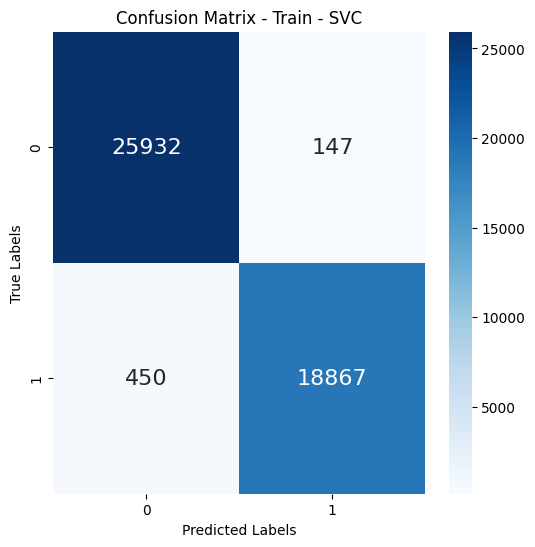

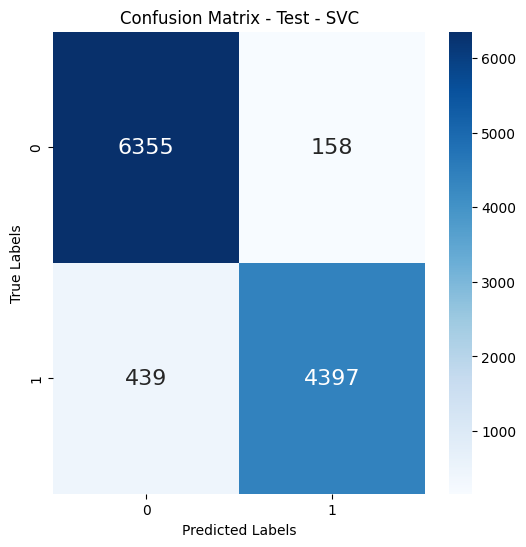

KNeighborsClassifier
*******Train************
Accuracy:  0.6870208828971716
Precision:  0.9487089408044967
Recall:  0.2795982813066211
F1 Score:  0.43190723710515794
*******Test************
Accuracy:  0.6571504097277293
Precision:  0.928377153218495
Recall:  0.21174524400330852
F1 Score:  0.34483919851826905

 



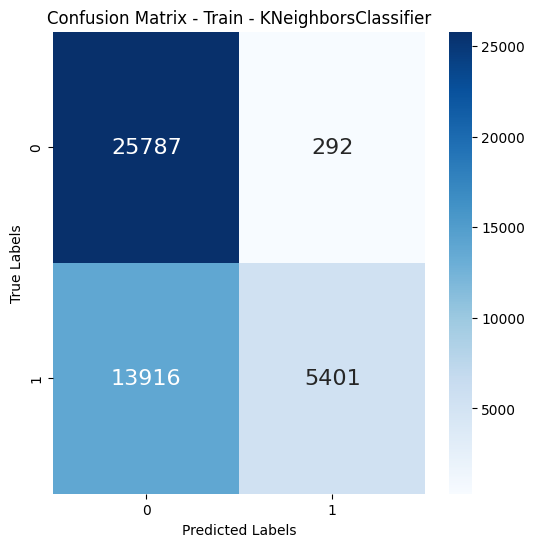

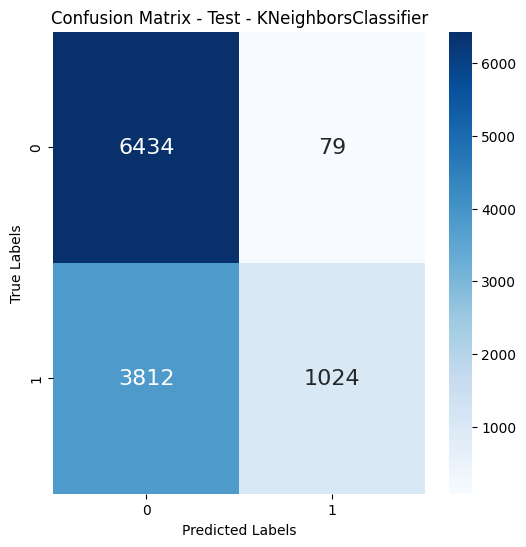

LogisticRegression
*******Train************
Accuracy:  0.9513172966781214
Precision:  0.9736944121393365
Recall:  0.9101827405911891
F1 Score:  0.9408679830898485
*******Test************
Accuracy:  0.9401709401709402
Precision:  0.9619915536785952
Recall:  0.8949545078577337
F1 Score:  0.9272629887520086

 



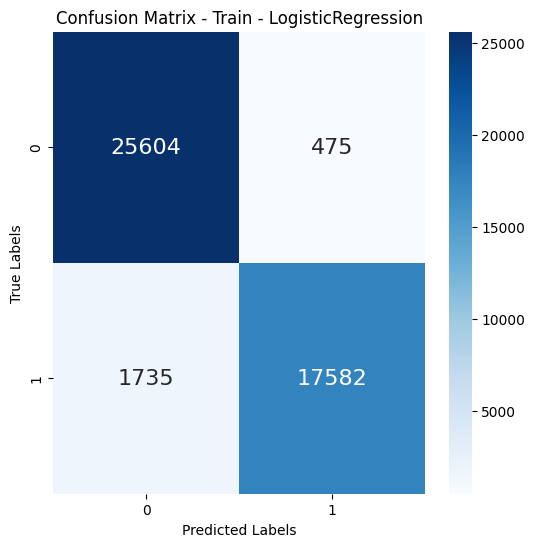

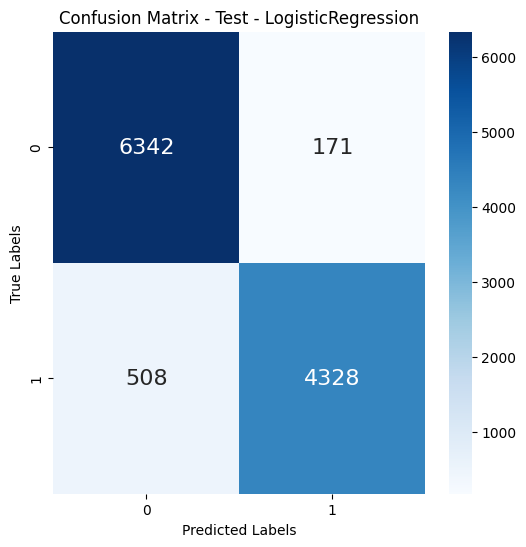

DecisionTreeClassifier
*******Train************
Accuracy:  0.9995374041765794
Precision:  0.9995857497928748
Recall:  0.9993270176528446
F1 Score:  0.999456366978177
*******Test************
Accuracy:  0.9305665697418275
Precision:  0.9204403822185293
Recall:  0.9162531017369727
F1 Score:  0.9183419689119171

 



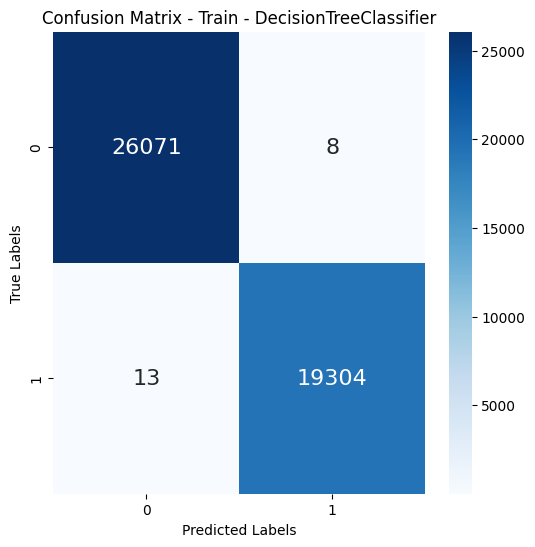

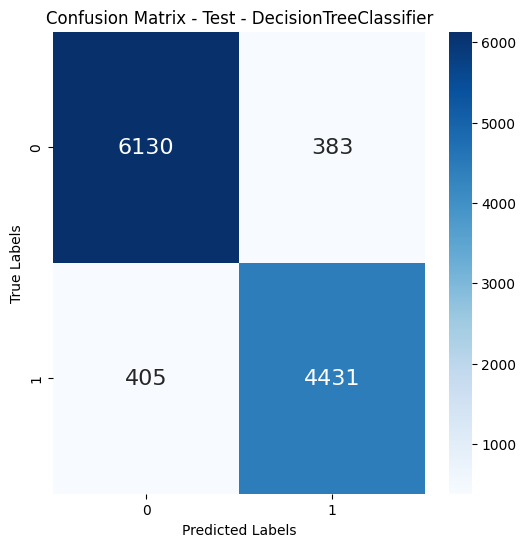

RandomForestClassifier
*******Train************
Accuracy:  0.9995374041765794
Precision:  0.9995340167753961
Recall:  0.9993787855257027
F1 Score:  0.9994563951230877
*******Test************
Accuracy:  0.9419332099744471
Precision:  0.9399620813145144
Recall:  0.9226633581472291
F1 Score:  0.9312323906918502

 



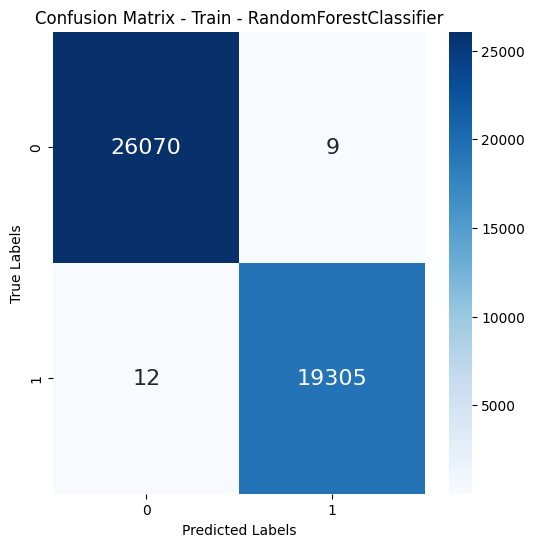

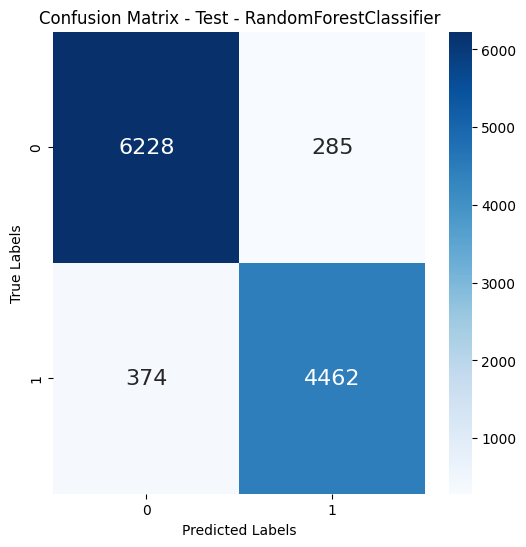

MultinomialNB
*******Train************
Accuracy:  0.9412062736805005
Precision:  0.9254318716140243
Recall:  0.9373608738416939
F1 Score:  0.9313581770953887
*******Test************
Accuracy:  0.9203454048814873
Precision:  0.899431125558716
Recall:  0.9154259718775848
F1 Score:  0.9073580651772903

 



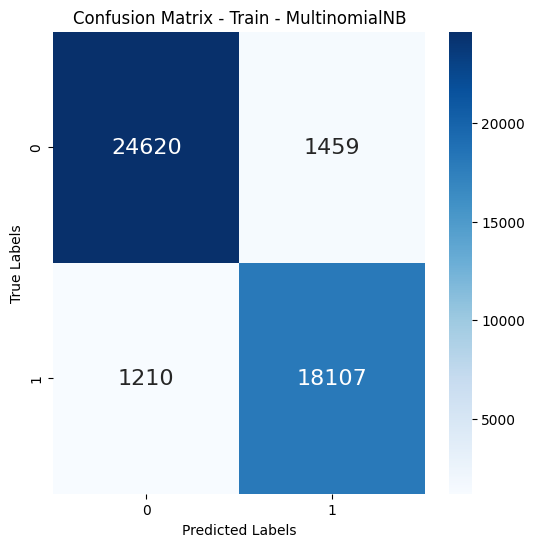

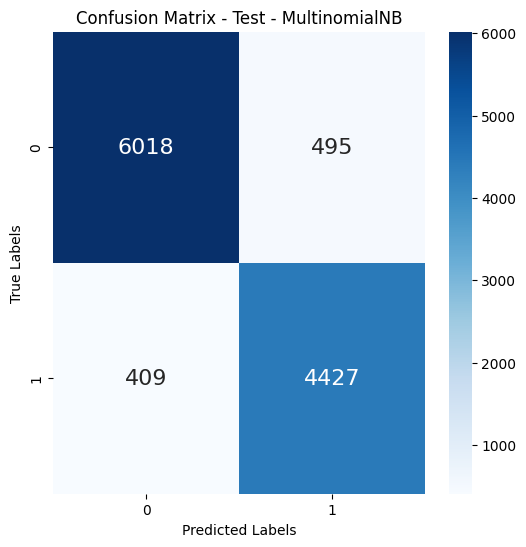

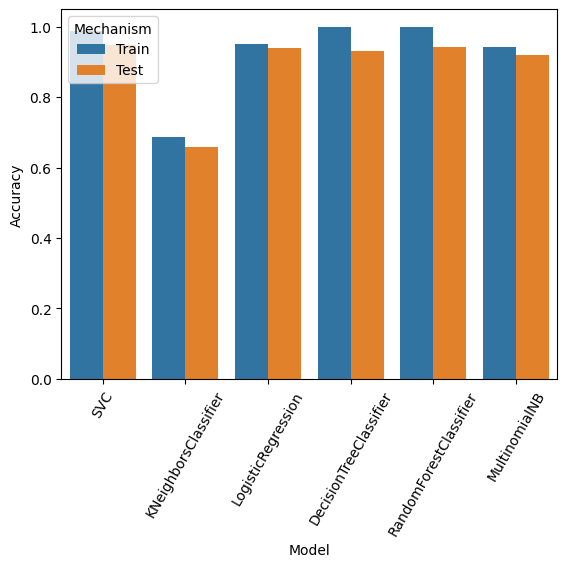

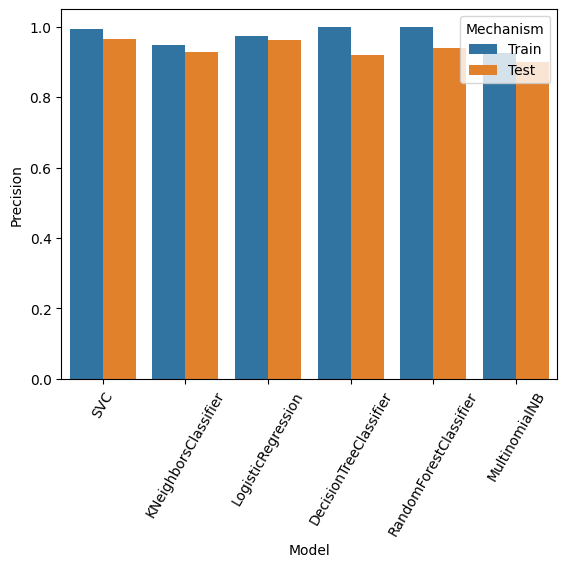

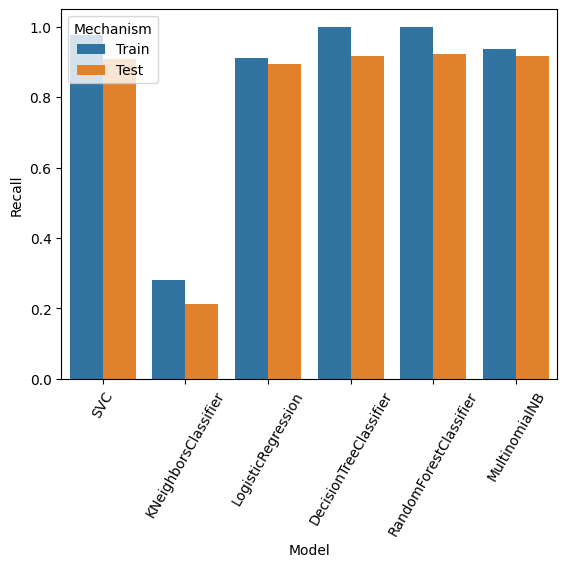

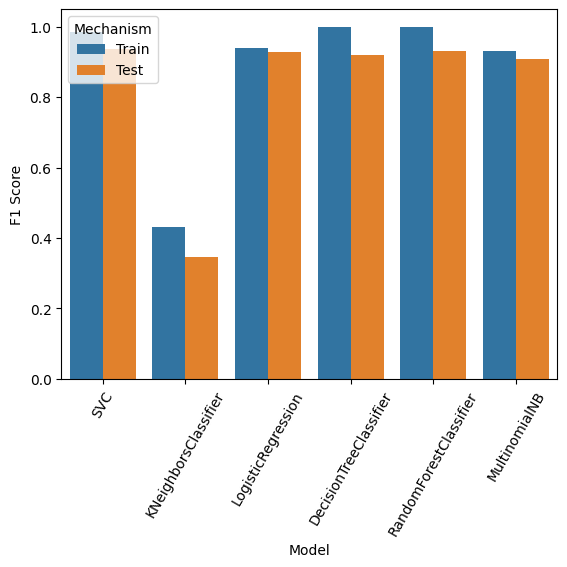

In [41]:
import sklearn.metrics
import seaborn as sns

models = [SVC(),KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),MultinomialNB()]
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []
model_names = []

for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    #train_probs = model.predict_proba(x_train)[:, 1]
    test_pred = model.predict(x_test)
    #test_probs = model.predict_proba(x_test)[:, 1]
    print(type(model).__name__)
    model_names.append(type(model).__name__)
    
    print("*******Train************")
    print("Accuracy: ",accuracy_score(y_train,train_pred))
    print("Precision: ",precision_score(y_train,train_pred))
    print("Recall: ",recall_score(y_train,train_pred))
    print("F1 Score: ",f1_score(y_train,train_pred))
    train_accuracies.append(accuracy_score(y_train,train_pred))
    train_precisions.append(precision_score(y_train,train_pred))
    train_recalls.append(recall_score(y_train,train_pred))
    train_f1s.append(f1_score(y_train,train_pred))
    
    print("*******Test************")
    print("Accuracy: ",accuracy_score(y_test,test_pred))
    print("Precision: ",precision_score(y_test,test_pred))
    print("Recall: ",recall_score(y_test,test_pred))
    print("F1 Score: ",f1_score(y_test,test_pred))
    test_accuracies.append(accuracy_score(y_test,test_pred))
    test_precisions.append(precision_score(y_test,test_pred))
    test_recalls.append(recall_score(y_test,test_pred))
    test_f1s.append(f1_score(y_test,test_pred))
    print("\n \n")
    # Calculate and display the confusion matrix for training data
    plot_confusion_matrices(y_train, train_pred, f"Confusion Matrix - Train - {type(model).__name__}")

    # Calculate and display the confusion matrix for testing data
    plot_confusion_matrices(y_test, test_pred, f"Confusion Matrix - Test - {type(model).__name__}")

    # Calculate and display the ROC-AUC curve for training data
    '''plot_roc_auc_curve(y_train, train_probs, f"ROC-AUC Curve - Train - {type(model).__name__}")

    # Calculate and display the ROC-AUC curve for testing data
    plot_roc_auc_curve(y_test, test_probs, f"ROC-AUC Curve - Test - {type(model).__name__}")'''

train_df = pd.DataFrame()
train_df['Accuracy'] =  train_accuracies
train_df['Precision'] =  train_precisions
train_df['Recall'] =  train_recalls
train_df['F1 Score'] =  train_f1s
train_df['Mechanism'] = "Train"
train_df['Model'] = model_names

test_df = pd.DataFrame()
test_df['Accuracy'] =  test_accuracies
test_df['Precision'] =  test_precisions
test_df['Recall'] =  test_recalls
test_df['F1 Score'] =  test_f1s
test_df['Mechanism'] = "Test"
test_df['Model'] = model_names

result_df = pd.concat([train_df, test_df])
for metric in ['Accuracy','Precision','Recall','F1 Score']:
    sns.barplot(data =result_df,x ='Model',y = metric,hue="Mechanism")
    plt.xticks(rotation=60)
    plt.show()

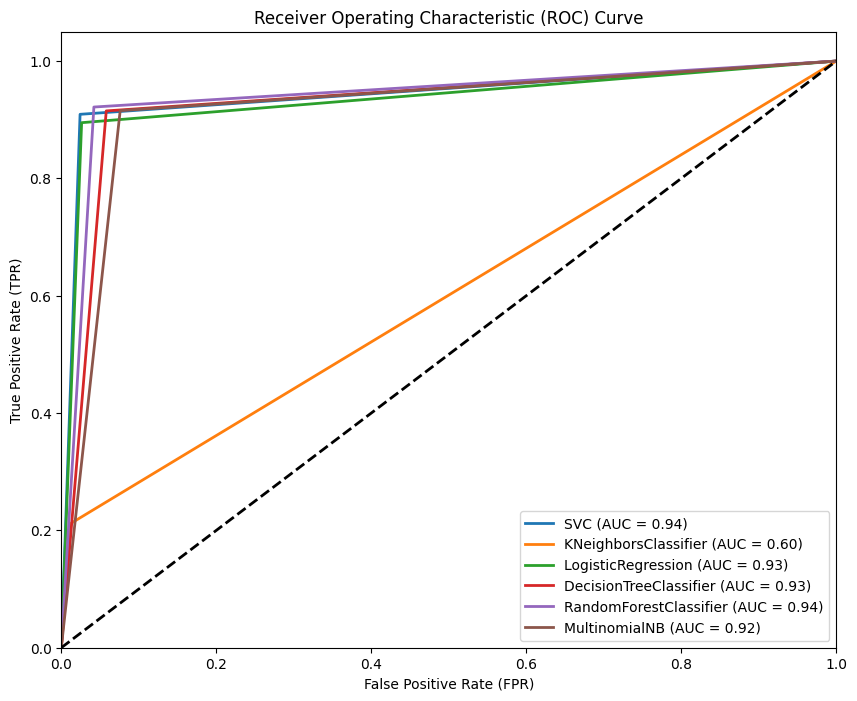

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Lists to store ROC curve data
fpr_list = []
tpr_list = []
roc_auc_list = []
model_names = []

models = [SVC(), KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), MultinomialNB()]

for model in models:
    model_name = type(model).__name__
    model_names.append(model_name)

    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

    # Calculate ROC-AUC score
    roc_auc = auc(fpr, tpr)
    roc_auc_list.append(roc_auc)
    
# Plot ROC-AUC curves for all models
plt.figure(figsize=(10, 8))
for i in range(len(models)):
    plt.plot(fpr_list[i], tpr_list[i], lw=2, label=f'{model_names[i]} (AUC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##  Project 3 : Regression Problem 1


### In this problem, the task is to predict the current health (as given by the target variable) of an organism given the measurements from two biological sensors measuring their bio-markers (negative indicates that it is lesser than the average case). With this data, you are expected to try our linear regression models on the training data and report the following metrics on the test split: (a) Mean Squared Error, (b) Mean Absolute Error.

In [43]:
# Import Libraries

import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
import sklearn
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.linear_model import LinearRegression

In [44]:
# Load Dataset

df1 = pd.read_csv("p1_train.csv", header=None, names=["A", "B", "Target"])
df1

,A,B,Target
0,-7.262173,9.572604,5.358725
1,3.462140,10.684524,-13.275822
2,-12.996801,-3.446163,31.815190
3,7.083537,-14.074146,1.995030
4,-15.216890,-18.630651,48.812452
...,...,...,...
9995,16.981033,-7.377274,-21.776089
9996,0.258434,-19.488764,22.098571
9997,17.588664,11.326009,-47.812604
9998,0.531756,-15.189405,20.791085


In [45]:
df2 = pd.read_csv("p1_test.csv", header=None, names=["A","B","Target"])
df2

,A,B,Target
0,15.893003,11.712829,-37.567929
1,-2.722421,-4.540615,11.475211
2,-14.587111,18.592864,11.468441
3,0.224331,16.433306,-15.159309
4,-12.215286,11.742682,17.392223
...,...,...,...
4995,-14.424996,7.055352,21.402087
4996,-12.249485,12.226991,14.971488
4997,-19.242759,-18.218209,56.687193
4998,-13.561869,2.773022,26.627790


In [46]:
x = df1.drop(columns=["Target"])
y = df1["Target"]

In [47]:
# Linear Regression

Linear_model = LinearRegression().fit(x, y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_pred = Linear_model.predict(X_train)
y_test_pred = Linear_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

metrics_train = {"mean_squared_error_train" : mse_train,
                "mean_absolute_error_train": mae_train}

metrics_test = {"mean_squared_error_test": mse_test,
               "mean_absolute_error_test": mae_test}

print("Train_Data: ", metrics_train)
print("Test_Data:", metrics_test)


y_pred = Linear_model.predict(df2[["A","B"]])

mse_y_pred = mean_squared_error(df2["Target"], y_pred)
mae_y_pred = mean_absolute_error(df2["Target"], y_pred)

metrics_y_pred_linear = {"mean_squared_error_test": mse_y_pred,
                        "mean_absolute_error_test": mae_y_pred}

print("y_pred_metrics:", metrics_y_pred_linear)

Train_Data:  {'mean_squared_error_train': 5.054234220218337, 'mean_absolute_error_train': 1.793708330761995}
Test_Data: {'mean_squared_error_test': 5.081486197345235, 'mean_absolute_error_test': 1.7839327239219742}
y_pred_metrics: {'mean_squared_error_test': 5.046436003951251, 'mean_absolute_error_test': 1.7990800530982607}


## Problem 4: Regression Problem 2

### Here, you are expected to predict the lifespan of the above organism given the data from three sensors. In this case, the model is not linear. You are expected to try several (at least 3) non-linear regression models on the train split and report the following metrics on the test split (a) Mean Squared Error, (b) Mean Absolute Error.

### Models to use: Suppot Vector Regression, Linear Regression.

In [48]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [49]:
# Load the Dataset

df1 = pd.read_csv("p2_train.csv", header=None, names=["A", "B", "C", "Target"])
df1

,A,B,C,Target
0,6.501996,-8.536983,3.422935,119980.220246
1,1.328383,8.943578,-8.145307,29890.224974
2,0.161478,-7.928351,1.628924,3245.579405
3,-8.989890,0.621330,-2.322925,411824.663771
4,5.185118,7.902611,7.559619,176097.137744
...,...,...,...,...
9995,-0.209969,0.516290,1.757739,4.730791
9996,-1.908943,8.884813,-8.949701,67718.037645
9997,5.155422,5.500823,7.804984,165778.153769
9998,7.410197,-3.096079,4.394444,212850.414030


In [50]:
df2 = pd.read_csv("p2_test.csv", header=None, names=["A", "B", "C", "Target"])
df2

,A,B,C,Target
0,-1.453098,-3.535848,4.957581,5738.079257
1,-0.951478,-4.954119,-4.572673,391.728338
2,3.876805,9.707116,6.012681,72127.820634
3,4.944532,8.173724,2.526409,35939.928053
4,8.422242,1.181565,3.208955,365974.814979
...,...,...,...,...
4995,7.325928,-2.517590,0.681199,158822.870077
4996,5.063459,-1.450395,-7.034063,325.749863
4997,-6.716127,2.112438,2.746665,55743.437853
4998,8.971959,-3.130959,-5.372547,417527.327099


In [51]:
x = df1.drop(columns=["Target"])
y = df1["Target"]

In [52]:
# SVR

model = SVR().fit(x, y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

metrics_train = {"mean_squared_error_train": mse_train,
                "mean_absolute_error_train": mae_train}

metrics_test = {"mean_squared_error_test": mse_test,
               "mean_absolute_error_test": mae_test}

print("Train_Data: ", metrics_train)
print("Test_Data: ", metrics_test)


y_pred = model.predict(df2[["A", "B", "C"]])

mse_y_pred = mean_squared_error(df2["Target"], y_pred)
mae_y_pred = mean_absolute_error(df2["Target"], y_pred)

metrics_y_pred = {"mean_squared_error_test": mse_y_pred,
                 "mean_absolute_error_test": mae_y_pred}

print("y_pred_metrics: ", metrics_y_pred)

Train_Data:  {'mean_squared_error_train': 75459864496.41516, 'mean_absolute_error_train': 147485.99229845326}
Test_Data:  {'mean_squared_error_test': 79892066388.63107, 'mean_absolute_error_test': 150288.56747878977}
y_pred_metrics:  {'mean_squared_error_test': 77888697059.87163, 'mean_absolute_error_test': 150475.59108079062}


In [53]:
# Linear Regression

Linear_model = LinearRegression().fit(x,y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_pred = Linear_model.predict(X_train)
y_test_pred = Linear_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

metrics_train = {"mean_squared_error_train": mse_train,
                "mean_absolute_error_train": mae_train}

metrics_test = {"mean_squared_error_test": mse_test,
               "mean_absolute_error_test": mae_test}

print("Train_Data: ", metrics_train)
print("Test_Data: ", metrics_test)


y_pred = Linear_model.predict(df2[["A","B","C"]])

mse_y_pred = mean_squared_error(df2["Target"], y_pred)
mae_y_pred = mean_absolute_error(df2["Target"], y_pred)

metrics_y_pred_linear = {"mean_squared_error_test": mse_y_pred,
                        "mean_absolute_error_test": mae_y_pred}

print("y_pred_metrics: ", metrics_y_pred_linear)

Train_Data:  {'mean_squared_error_train': 61042815958.91605, 'mean_absolute_error_train': 173137.92936374238}
Test_Data:  {'mean_squared_error_test': 62227903330.995674, 'mean_absolute_error_test': 174542.25128146732}
y_pred_metrics:  {'mean_squared_error_test': 62332720766.18977, 'mean_absolute_error_test': 172939.29867514668}


In [54]:
#Random Forest

Random_model=RandomForestRegressor().fit(x, y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_pred= Random_model.predict(X_train)
y_test_pred= Random_model.predict(X_test)

mse_train= mean_squared_error(y_train,y_train_pred)
mae_train= mean_absolute_error(y_train,y_train_pred)


mse_test= mean_squared_error(y_test, y_test_pred)
mae_test= mean_absolute_error(y_test, y_test_pred)


metrics_train= {"mean_squared_error_train":mse_train,
                "mean_absolute_error_train":mae_train}

metrics_test= {"mean_squared_error_test":mse_test,
                "mean_absolute_error_test":mae_test}

print("Train Data: ",metrics_train)
print("Test Data: ",metrics_test)

y_pred= Random_model.predict(df2[["A","B","C"]])

mse_y_pred= mean_squared_error(df2["Target"], y_pred)
mae_y_pred= mean_absolute_error(df2["Target"], y_pred)

metrics_y_pred_random= {"mean_squared_error_test":mse_y_pred,
                        "mean_absolute_error_test":mae_y_pred}

print("y_pred_metrics: ", metrics_y_pred_random)

Train Data:  {'mean_squared_error_train': 42105576.20443737, 'mean_absolute_error_train': 3178.524207716087}
Test Data:  {'mean_squared_error_test': 51907747.218235925, 'mean_absolute_error_test': 3379.8383949032786}
y_pred_metrics:  {'mean_squared_error_test': 314811941.2130913, 'mean_absolute_error_test': 8802.391893627357}


In [55]:
#Decision Tree

Decision_model=DecisionTreeRegressor().fit(x, y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_pred= Decision_model.predict(X_train)
y_test_pred= Decision_model.predict(X_test)

mse_train= mean_squared_error(y_train,y_train_pred)
mae_train= mean_absolute_error(y_train,y_train_pred)


mse_test= mean_squared_error(y_test, y_test_pred)
mae_test= mean_absolute_error(y_test, y_test_pred)


metrics_train= {"mean_squared_error_train":mse_train,
                "mean_absolute_error_train":mae_train}

metrics_test= {"mean_squared_error_test":mse_test,
                "mean_absolute_error_test":mae_test}

print("Train Data: ",metrics_train)
print("Test Data: ",metrics_test)

y_pred= Decision_model.predict(df2[["A","B","C"]])

mse_y_pred= mean_squared_error(df2["Target"], y_pred)
mae_y_pred= mean_absolute_error(df2["Target"], y_pred)

metrics_y_pred_decision= {"mean_squared_error_test":mse_y_pred,
                        "mean_absolute_error_test":mae_y_pred}

print("y_pred_metrics: ", metrics_y_pred_decision)

Train Data:  {'mean_squared_error_train': 0.0, 'mean_absolute_error_train': 0.0}
Test Data:  {'mean_squared_error_test': 0.0, 'mean_absolute_error_test': 0.0}
y_pred_metrics:  {'mean_squared_error_test': 794222139.4504904, 'mean_absolute_error_test': 14006.727251614655}
